## Импорты

стандартные библиотеки

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import folium

In [97]:
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

дополнительные импорты

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from geopy.geocoders import Nominatim
from IPython.display import display

чтобы никто не осуждал

In [99]:
import warnings
warnings.filterwarnings("ignore")

## Базовая информация о датасете

In [100]:
data = "./protein_europe.csv"

In [101]:
df = pd.read_csv(data, index_col=False, encoding="utf-8", sep=";")
df.head(20)

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,"10,1","1,4","0,5","8,9","0,2","42,3","0,6","5,5","1,7"
1,Austria,"8,9",14,"4,3","19,9","2,1",28,"3,6","1,3","4,3"
2,Belgium,"13,5","9,3","4,1","17,5","4,5","26,6","5,7","2,1",4
3,Bulgaria,"7,8",6,"1,6","8,3","1,2","56,7","1,1","3,7","4,2"
4,Czechoslovakia,"9,7","11,4","2,8","12,5",2,"34,3",5,"1,1",4
5,Denmark,"10,6","10,8","3,7",25,"9,9","21,9","4,8","0,7","2,4"
6,E_Germany,"8,4","11,6","3,7","11,1","5,4","24,6","6,5","0,8","3,6"
7,Finland,"9,5","4,9","2,7","33,7","5,8","26,3","5,1",1,"1,4"
8,France,18,"9,9","3,3","19,5","5,7","28,1","4,8","2,4","6,5"
9,Greece,"10,2",3,"2,8","17,6","5,9","41,7","2,2","7,8","6,5"


In [102]:
df.dropna(inplace=True)

cols = df.columns.drop('Country')
for col in cols:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

df.head(20)

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4
6,E_Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4
8,France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5
9,Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5


In [103]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    25 non-null     object 
 1   RedMeat    25 non-null     float64
 2   WhiteMeat  25 non-null     float64
 3   Eggs       25 non-null     float64
 4   Milk       25 non-null     float64
 5   Fish       25 non-null     float64
 6   Cereals    25 non-null     float64
 7   Starch     25 non-null     float64
 8   Nuts       25 non-null     float64
 9   Fr&Veg     25 non-null     float64
dtypes: float64(9), object(1)
memory usage: 2.1+ KB
None


In [104]:
print(df.describe().round(2))

       RedMeat  WhiteMeat   Eggs   Milk   Fish  Cereals  Starch   Nuts  Fr&Veg
count    25.00      25.00  25.00  25.00  25.00    25.00   25.00  25.00   25.00
mean      9.83       7.90   2.94  17.11   4.28    32.25    4.28   3.07    4.14
std       3.35       3.69   1.12   7.11   3.40    10.97    1.63   1.99    1.80
min       4.40       1.40   0.50   4.90   0.20    18.60    0.60   0.70    1.40
25%       7.80       4.90   2.70  11.10   2.10    24.30    3.10   1.50    2.90
50%       9.50       7.80   2.90  17.60   3.40    28.00    4.70   2.40    3.80
75%      10.60      10.80   3.70  23.30   5.80    40.10    5.70   4.70    4.90
max      18.00      14.00   4.70  33.70  14.20    56.70    6.50   7.80    7.90


In [105]:
df.shape

(25, 10)

## Разведочный анализ данных

<Axes: >

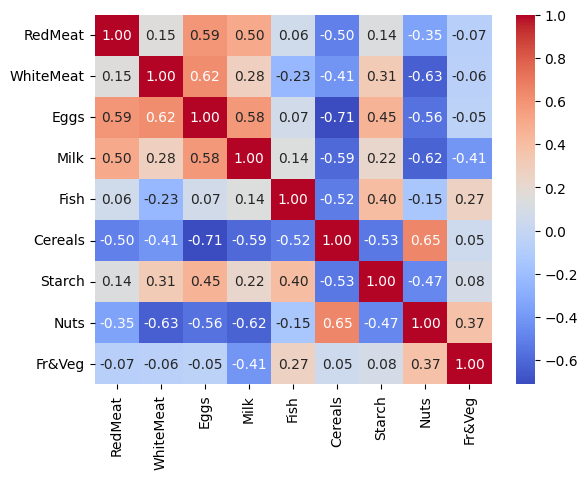

In [106]:
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')

In [107]:
fig = px.scatter_matrix(
    df,
    dimensions=['RedMeat','WhiteMeat','Eggs','Milk','Fish','Cereals','Starch','Nuts','Fr&Veg'],
    hover_name='Country',
    title='Матрица взаимосвязей потребления продуктов по странам',
    template='plotly_white',
    height=1000  # увеличиваем высоту фигуры
)
fig.show()

In [108]:
df = pd.read_csv("protein_europe.csv", sep=";")

df.fillna(0, inplace=True)

for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

df.head(10)

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4
6,E_Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4
8,France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5
9,Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5


## Кластеризация

Кол-во городов не очень большое → здесь удобно будет использовать `DBSCAN` (плотностный метод кластеризации). Если признаки измеряются в разных единицах (например, доход в тысячах и процент в долях), то признаки с большими значениями будут преобладать и искажать результаты.

Стандартизация приводит каждый признак к нулевому среднему и единичному стандартному отклонению:

$$
z = \frac{x - \mu}{\sigma},
$$
где:
- $x$ - исходное значение признака
- $\mu$ - среднее значение признака
- $\sigma$ - стандартное отклонение

In [109]:
X = df.drop(columns="Country")
scaler = StandardScaler()
X_scaled = StandardScaler().fit_transform(df.drop(columns=['Country']))

Поскольку я здесь хочу применить `DBSCAN`, хочется как-то оптимизировать параметры в самой функции `sklearn.cluster.DBSCAN`, чтобы получить лучшие результаты кластеризации. У самой функции есть параметры:
- `eps` - радиус поиска соседей вокруг точки (ед. изм. такие же, как и у данных после станд-ции)
- `min_samples` - минимальное количество точек для кластера (*точка считается ядром, если в её eps-окрестности есть хотя бы min_samples точек, включая саму точку*)
- `metric` - как считается расстояние между точками (по умолчанию: `euclidean`)
- `algorithm` - алгоритм поиска соседей (по умолчанию: `auto`)
- `leaf_size` - размер листа дерева при использовании `ball_tree` или `kd_tree` (варианты algorithm)
- `p` - параметр для `minkowski` (варианты metric)
- `n_jobs` - количество потоков (`-1` - все ядра)

Для подбора оптимальных параметров DBSCAN будем перебирать все комбинации `(eps, min_samples)` из следующих диапазонов `eps` $\in$ [1, 3] с шагом 0.1, `min_samples` $\in$ [2, 5] с шагом 1.

Для каждой пары выполним кластеризацию и напишем количество полученных кластеров

In [110]:
eps_range = np.round(np.arange(1, 3.1, 0.1), 1)
min_samples_range = range(2, 6)

Ниже функция для перебора значений параметров `eps` и `min_samples` для DBSCAN и оценки качества кластеризации.  
Для каждой пары параметров вычисляется количество кластеров и метрики качества (`silhouette_score`, `calinski_harabasz_score`, `davies_bouldin_score`) и формируется таблица с распределением стран по кластерам

<details>
<summary>Зачем всё это и как работает?</summary>

После получения количества кластеров для каждой пары параметров, будет много ячеек, во многих из которых будет одинаковое число. Чтобы понять, где города распределились по одному и тому же количеству кластеров хочу исопльщовать метрики качества

В прошлых лабораторных работах были описаны методы оценки оптимального количества кластеров. Опираться только на один не хочется, т.к. в прошлых лабораторных работах было видно, что разные методы могут иногда показывать немного разные результаты, поэтому использую сразу 3 и поом их усредняю, чтобы получить более точное значение

А таблица нужна для того, чтобы потом удобно для полученных параметров вывести распределение городов по кластерам


</details>

In [111]:
def run_dbscan_grid(df, X_scaled, eps_range, min_samples_range):
    results, cluster_matrices = [], {}

    for eps in eps_range:
        for min_s in min_samples_range:
            labels = DBSCAN(eps=eps, min_samples=min_s).fit_predict(X_scaled)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            if n_clusters > 1:
                sil = silhouette_score(X_scaled, labels)
                ch = calinski_harabasz_score(X_scaled, labels)
                dbi = davies_bouldin_score(X_scaled, labels)
            else:
                sil = ch = dbi = np.nan

            results.append({
                "eps": eps,
                "min_samples": min_s,
                "silhouette": sil,
                "calinski": ch,
                "davies": dbi,
                "n_clusters": n_clusters
            })

            clusters = sorted(set(labels))
            cluster_dict = {c: df.loc[labels == c, 'Country'].tolist() for c in clusters}
            max_len = max(len(v) for v in cluster_dict.values())
            cluster_df = pd.DataFrame({f'Cluster {c}': v + [''] * (max_len - len(v)) for c, v in cluster_dict.items()})
            cluster_matrices[(eps, min_s)] = cluster_df

    return pd.DataFrame(results), cluster_matrices

Здесь как раз сравнивается "эталонный" реазультат (подробнее в пояснении выше) с полученным

In [112]:
def compute_quality(df):
    df['sil_norm'] = (df['silhouette'] + 1) / 2
    df['ch_norm'] = df['calinski'] / df['calinski'].max()
    df['db_norm'] = 1 - (df['davies'] / df['davies'].max())
    df['quality'] = df[['sil_norm', 'ch_norm', 'db_norm']].mean(axis=1) * 100
    return df

В зависимости от того, насколько реальный полученный результат близок к "эталону" ячейка раскрашивается в нужный цвет (чем ярче, тем ближе к эталону)

In [113]:
def plot_quality_heatmap(df):
    pivot_q = df.pivot(index='min_samples', columns='eps', values='quality')
    pivot_n = df.pivot(index='min_samples', columns='eps', values='n_clusters')
    plt.figure(figsize=(16, 8))
    sns.heatmap(pivot_q, annot=pivot_n.astype(int), fmt='d', cmap='viridis')
    plt.title("Количество кластеров по DBSCAN\n(цвет = качество, цифры = количество кластеров)")
    plt.xlabel("eps")
    plt.ylabel("min_samples")
    plt.show()
    return pivot_q, pivot_n

Функция, на вход которой будет поступать словарь с кластерами и параметрами, а на выход будет выводить таблицу с распределением стран по кластерам

In [114]:
def get_cluster_df(cluster_matrices, eps, min_s):
    key = (float(round(eps, 1)), int(min_s))
    df_clusters = cluster_matrices.get(key)
    return df_clusters

Применение функций, описанных выше для вывода матрицы путаницы

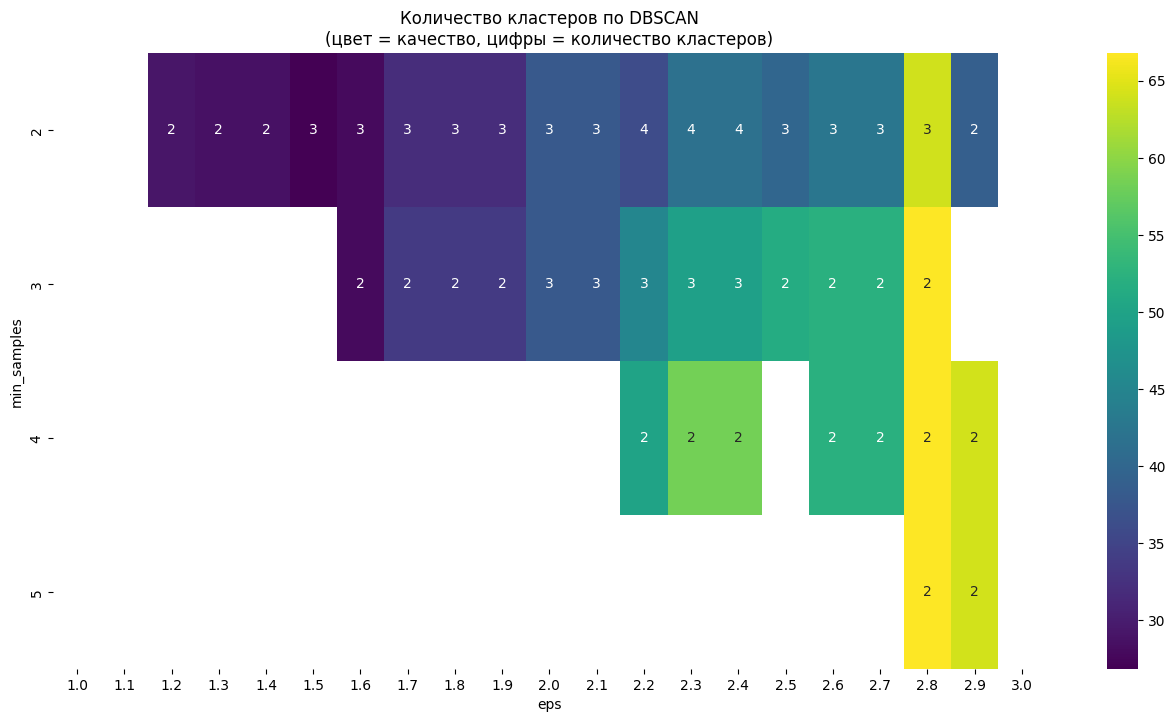

In [115]:
res_df, cluster_matrices = run_dbscan_grid(df, X_scaled, eps_range, min_samples_range)
res_df = compute_quality(res_df)
pivot_quality, pivot_n = plot_quality_heatmap(res_df)

Теперь выводим таблицу распределения по кластерам

In [116]:
eps = 2.3
min_s = 2

cluster_matrices[(eps, min_s)]

,Cluster -1,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,Albania,Austria,Bulgaria,Denmark,Greece
1,Hungary,Belgium,Romania,Finland,Italy
2,Portugal,Czechoslovakia,Yugoslavia,Norway,
3,Spain,E_Germany,,Sweden,
4,USSR,France,,,
5,,Ireland,,,
6,,Netherlands,,,
7,,Poland,,,
8,,Switzerland,,,
9,,UK,,,


Таким образом, получили следующее распределение

| Кластер | Описание |
|-|-|
| -1 | Страны с разным потреблением продуктов, которые DBSCAN посчитал выбросами |
| 0 | Центрально- и западноевропейские страны с умеренным потреблением мяса и молочных продуктов |
| 1 | Восточноевропейские страны с высоким потреблением зерновых продуктов |
| 2 | Скандинавские страны с высоким потреблением молочных продуктов и рыбы |
| 3 | Южные страны с высоким потреблением овощей и фруктов, меньшим количеством мяса и молока |

## Визуализация

Результат кажется логичным. Чтобы более наглядно посмотреть на распределение городов на карте, определим кооридинаты городов и отобразим их как это было сделано в предыдущей работе

In [117]:
df['DBSCAN_Cluster'] = DBSCAN(eps=eps, min_samples=min_s).fit_predict(X_scaled)

В датасете есть городо, для которых невозможно будет определить координаты, поэтому выпишем их отдельно вручную

In [118]:
manual_coords = {
    "USSR": (55, 37),        # Москва
    "Yugoslavia": (44, 21),  # Белград, центр бывшей Югославии
    "E_Germany": (51, 13),   # Берлин (Восточная Германия)
    "W_Germany": (50.5, 8)   # Франкфурт-на-Майне
}

Определим теперь координаты для остальных стран, как делали это во 2 лабораторной работе:

In [119]:
geolocator = Nominatim(user_agent="geo_country_locator")

def get_coords(country):
    if country in manual_coords:
        return pd.Series(manual_coords[country])
    try:
        location = geolocator.geocode(country)
        if location:
            return pd.Series([location.latitude, location.longitude])
    except:
        pass
    return pd.Series([np.nan, np.nan])

df[["lat", "lon"]] = df["Country"].apply(get_coords)
time.sleep(1)  # чтобы не перегружать API

df.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,DBSCAN_Cluster,lat,lon
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,-1,41.000028,19.999962
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,0,47.593970,14.124560
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,0,50.640281,4.666715
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,1,42.607397,25.485662
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,0,48.257918,14.500769


Визуализируем распределение данных на плоскости (PCA 2D), чтобы увидеть форму данных

In [120]:
drop_cols = [c for c in ['Country', 'DBSCAN_Cluster'] if c in df.columns]
X_scaled = StandardScaler().fit_transform(df.drop(columns=drop_cols, errors='ignore'))

df[['PC1', 'PC2']] = PCA(n_components=2).fit_transform(X_scaled)

color_col = 'DBSCAN_Cluster' if 'DBSCAN_Cluster' in df.columns else None
if color_col:
    df[color_col] = df[color_col].astype(str)

fig = px.scatter(
    df,
    x='PC1', y='PC2',
    color=color_col,
    text='Country',
    size=np.full(len(df), 15),
    title='DBSCAN кластеры (2D PCA)',
    template='plotly_white',
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_traces(textposition='top center')
fig.show()

In [121]:
clusters = sorted(df['DBSCAN_Cluster'].unique())
colors = cm.get_cmap('Set1', len(clusters))
color_map = {c: mcolors.rgb2hex(colors(i)) for i, c in enumerate(clusters)}

# Создаем карту
map_plot = folium.Map(location=[55, 10], zoom_start=3, tiles='CartoDB Voyager')

for cluster in clusters:
    fg = folium.FeatureGroup(name=f"Кластер {cluster}")
    
    for _, row in df[df['DBSCAN_Cluster'] == cluster].dropna(subset=['lat','lon']).iterrows():
        tooltip = f"{row['Country']} (Кластер {cluster})"
        folium.CircleMarker(
            location=[row['lat'], row['lon']],
            radius=7,
            color=color_map[cluster],
            fill=True,
            fill_color=color_map[cluster],
            fill_opacity=0.8,
            tooltip=tooltip
        ).add_to(fg)
    
    fg.add_to(map_plot)

folium.LayerControl(collapsed=False).add_to(map_plot)
map_plot

## Ответ

Получили следующее распределение:
| Кластер | Описание |
|-|-|
| -1 | Страны с разным потреблением продуктов, которые DBSCAN посчитал выбросами |
| 0 | Центрально- и западноевропейские страны с умеренным потреблением мяса и молочных продуктов |
| 1 | Восточноевропейские страны с высоким потреблением зерновых продуктов |
| 2 | Скандинавские страны с высоким потреблением молочных продуктов и рыбы |
| 3 | Южные страны с высоким потреблением овощей и фруктов, меньшим количеством мяса и молока |

В 0 кластере находятся страны центральной и заподной Европы, где люди исопльзуют примерно одни и те же продукты.

В 1 кластере находятся страны восточной Европы, где развита зерновая культура.

Во 2 кластер входят Скандинавские страны, где развито производство молочной продукции, а также раболовное дело, поэтому и потребление этих продуктов выделяется по сравнению с другими.

В 3 кластере находятя Южные страны: Греция и Италия, которым присуще оригинальные продукты, которые не так часто используются в других странах.

Наконец, 0 кластер - страны, которые слишком сильно различаются по использованным продуктам.